In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_withtags_path = 'cleanedDataFrameWithTagsV2.json'
df_withtags = pd.read_json(df_withtags_path)

In [52]:
print(len(df_withtags))

693


In [72]:
df_withtags.loc[10354, 'name']

'Glenfarclas 105°Litre'

In [4]:
# group products by area
regions = ['Speyside', 'Highlands', 'Islands', 'Islay', 'Campbeltown', 'Lowlands']

In [5]:
list_item_features = ['soft', 'sweet', 'fruit', 'smoky', 'rich', 'fresh', 'vanilla', 
'spice', 'peaty', 'chocolate', 'oak', 'toffee','nut', 'citrus', 'creamy', 'earthy', 
'leaf', 'nutmeg', 'cinnamon', 'banana', 'apple', 'pineapple', 'toast', 'sherry',
'dry', 'liquoric', 'wood', 'bitter', 'coffee']

In [55]:
# collect flavors information
dict_features = {feature:0 for feature in list_item_features}
for ind in df_withtags.index:
    tags = df_withtags.loc[ind]['tags']
    for tag in tags:
        dict_features[tag] += 1
    
for key, value in dict_features.items():
    dict_features[key] = dict_features[key]/len(df_withtags)*100

In [56]:
dict_features

{'soft': 26.83982683982684,
 'sweet': 55.84415584415584,
 'fruit': 48.34054834054834,
 'smoky': 39.24963924963925,
 'rich': 34.05483405483405,
 'fresh': 19.047619047619047,
 'vanilla': 31.601731601731604,
 'spice': 41.99134199134199,
 'peaty': 37.51803751803752,
 'chocolate': 22.51082251082251,
 'oak': 31.746031746031743,
 'toffee': 46.464646464646464,
 'nut': 12.554112554112553,
 'citrus': 38.38383838383838,
 'creamy': 20.346320346320347,
 'earthy': 11.976911976911978,
 'leaf': 8.658008658008658,
 'nutmeg': 7.07070707070707,
 'cinnamon': 16.017316017316016,
 'banana': 4.617604617604617,
 'apple': 22.943722943722943,
 'pineapple': 6.926406926406926,
 'toast': 9.812409812409813,
 'sherry': 23.52092352092352,
 'dry': 25.252525252525253,
 'liquoric': 8.946608946608947,
 'wood': 21.356421356421357,
 'bitter': 12.121212121212121,
 'coffee': 7.792207792207792}

In [57]:
df_features = pd.Series(dict_features)

In [58]:
%matplotlib inline  

In [59]:
new_df = df_features.to_frame()
new_df.reset_index(inplace=True)
new_df.columns = ['tag', 'perc']
print(new_df.columns.values)

['tag' 'perc']


In [63]:
new_df.sort_values(by=['perc'], ascending=False, inplace=True)
print(new_df)

          tag       perc
1       sweet  55.844156
2       fruit  48.340548
11     toffee  46.464646
7       spice  41.991342
3       smoky  39.249639
13     citrus  38.383838
8       peaty  37.518038
4        rich  34.054834
10        oak  31.746032
6     vanilla  31.601732
0        soft  26.839827
24        dry  25.252525
23     sherry  23.520924
20      apple  22.943723
9   chocolate  22.510823
26       wood  21.356421
14     creamy  20.346320
5       fresh  19.047619
18   cinnamon  16.017316
12        nut  12.554113
27     bitter  12.121212
15     earthy  11.976912
22      toast   9.812410
25   liquoric   8.946609
16       leaf   8.658009
28     coffee   7.792208
17     nutmeg   7.070707
21  pineapple   6.926407
19     banana   4.617605


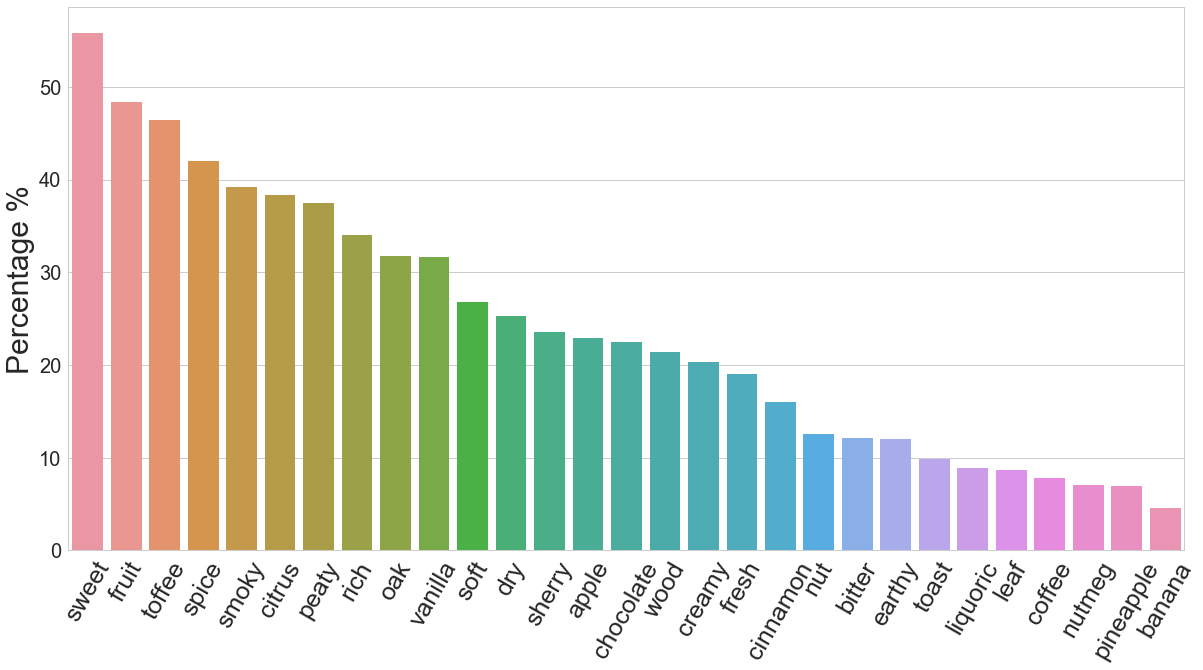

In [69]:
# plt.bar(df_features.columns.values, df_features.loc[0])
# plt.rcParams['figure.figsize'] = [20, 10]
# plt.xticks(rotation=60,fontsize=25);
sns.set(style="whitegrid")
ax = sns.barplot(x='tag', y='perc', data = new_df)
plt.rcParams['figure.figsize'] = [20, 10]
plt.xticks(rotation=60,fontsize=25)
plt.yticks(fontsize=20)
plt.xlabel('')
plt.ylabel('Percentage %', fontsize=30)
plt.savefig('keywordsPerc.pdf', bbox_inches='tight')

In [12]:
df_features

,soft,sweet,fruit,smoky,rich,fresh,vanilla,spice,peaty,chocolate,...,banana,apple,pineapple,toast,sherry,dry,liquoric,wood,bitter,coffee
0,186,387,335,272,236,132,219,291,260,156,...,32,159,48,68,163,175,62,148,84,54


In [23]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [26]:
# combine all the tags into one text
text_tags = ''
for ind in df_withtags.index:
    tags_list = df_withtags.loc[ind]['tags']
    if len(tags_list) > 0:
        tags_text = ' '.join(tags_list)
        tags_text = tags_text + ' '
    text_tags = text_tags + tags_text


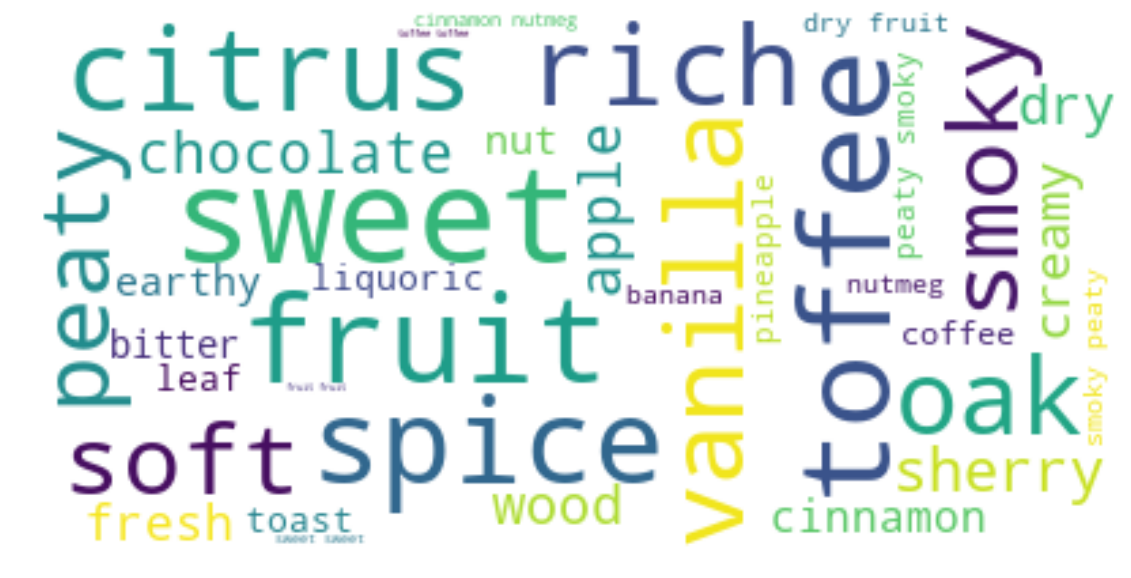

In [32]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_tags)
figure1 = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
figure1.savefig("keywords.pdf", bbox_inches='tight')

In [33]:
text_tags

'sherry fruit dry sweet sweet sweet chocolate toffee earthy smoky sweet vanilla spice coffee rich fruit bitter dry peaty oak creamy citrus sherry fresh wood bitter fruit citrus toffee vanilla smoky sweet oak earthy peaty dry nut toffee liquoric apple smoky spice fruit peaty sweet vanilla sherry dry leaf citrus oak cinnamon toffee liquoric apple smoky spice fruit peaty sweet vanilla sherry dry leaf citrus oak cinnamon sweet spice toffee vanilla vanilla chocolate citrus toffee fruit rich coffee oak sherry peaty smoky spice sweet wood liquoric cinnamon soft toast smoky peaty sweet rich toffee dry smoky peaty sweet rich toffee dry toffee toffee chocolate toffee smoky rich fruit sweet dry soft peaty spice sherry earthy oak bitter creamy nut apple sweet soft sherry dry fruit toast sweet peaty toffee citrus apple oak rich sweet nut fruit spice toffee citrus apple oak rich sweet nut fruit spice sherry chocolate toffee liquoric coffee smoky toast oak fresh citrus fruit bitter liquoric oak apple